In [2]:
import pandas as pd 
import numpy as np

In [3]:
df_bi = pd.read_csv("./data/train_bicycle.csv")
df_bi.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# df_ve = pd.read_csv("./data/train_vegetable.csv")
# df_ve.head()

# Section 04 
## 4-1 원핫인코딩

In [11]:
df_bi.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

카테고리형 feature  알아보기 

In [17]:
print("s : " , df_bi['season'].unique())
print("h : ", df_bi['holiday'].unique())
print("w : ", df_bi['workingday'].unique())
print("w : ", df_bi['weather'].unique())
# print("c : ", df_bi['casual'].unique())
# print("r : ", df_bi['registered'].unique())


s :  [1 2 3 4]
h :  [0 1]
w :  [0 1]
w :  [1 2 3 4]


season, 

In [4]:
# from sklearn.preprocessing import OneHotEncoder 
print("전 : ",df_bi.shape)
df_bi = pd.get_dummies(df_bi, columns= ['season', 'weather'])
print("후 : ", df_bi.shape)
df_bi.head()


전 :  (10886, 12)
후 :  (10886, 18)


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


## 4-2 특성 스케일링

> 정규화 표준화 차이는 무엇일까? 
[참고1](https://bskyvision.com/849) [참고2](https://mkjjo.github.io/python/2019/01/10/scaler.html)

- 정규화 : 특성 값의 범위를 `0~1` 로 옮김 
    - **이상치 존재에 매우 민감하다**

- 표준화 : 뮤 = 특성의 평균값, 시그마 = 표준편차 => `정규분포의 표준화` 
    - 표준화는 어떤 특성의 값을 정규분포(종모양의 분포)를 따른다고 가정하는 것 
    - `평균은 0`으로, `표준편차는 1`을 갖도록 변화하는 것 
    - 표준화를 해주면 정규화처럼 특성값의 범위가 `0~1 범위로 바뀌지 X` 
    - **이상치가 있는 경우 균형잡힌 척도를 보장할 수 없다**


> 그럼 둘 중에 어떤 것이 더 나은가? 
- 둘 다 해보고 성능을 비교해서 결정하는 것이 낫다. 
- 그리고 둘의 차이는 엄청 크다. 따라서 곡 비교해줘야 한다. 

> 추가 scaler 
- MaxAbsScaler : 최대절대값과 0이 각각 1과 0이 되도록 스케일링 
     - **큰 이상치 존재에 민감하다**
- RobustScaler : 중앙값과 `IQR`사용. 아웃라이어의 영향을 최소화 
+ `IQR` : Q3 - Q1 (상위 75% - 하위 25%) = box plot의 기본이 되는 수치  (Q1 - 1.5 X IQR ~ Q3 - 1.5 X IQR)


> 이상치 제거 필수 
- 결론적으로 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 한다. 



In [5]:
# 이상치 확인 
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns 


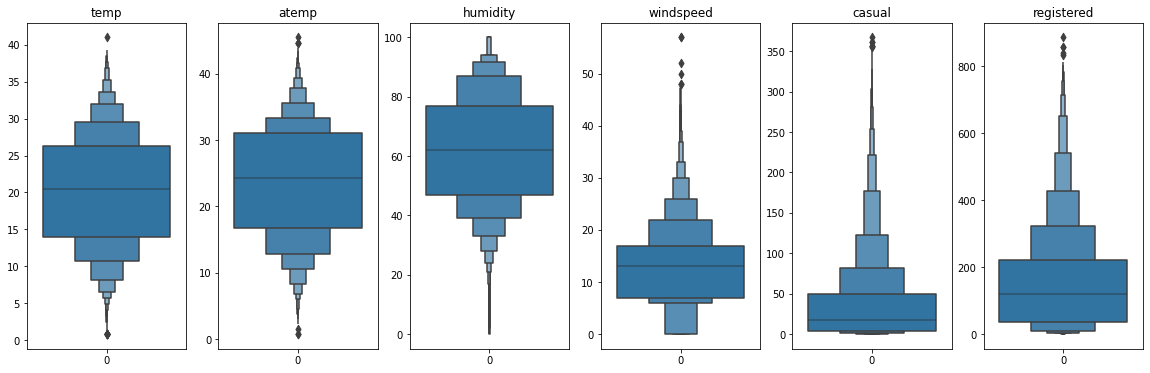

In [6]:
li_col = ['temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered']

fig, ax = plt.subplots(1,6, figsize = (20,6))
count = 0
for col in li_col : 
    sns.boxenplot(data = df_bi[col], ax = ax[count])
    ax[count].set_title(col)
    count +=1 
plt.show()

각 feature 별로 이상치가 humidity 빼고 다 있는 것을 확인할 수 있음 
- [이상치제거](https://hwi-doc.tistory.com/entry/IQR-%EB%B0%A9%EC%8B%9D%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EC%83%81%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0Outlier-%EC%A0%9C%EA%B1%B0) 

In [7]:
# 이상치 제거 
def get_outlier(df, col) : 
    Q25= np.percentile(df[col].values, 25)
    Q75= np.percentile(df[col].values, 75)
    
    IQR = Q75-Q25 
    
    lowest = Q25 - 1.5*IQR
    highest = Q75 + 1.5*IQR 
    
    outlier_idx = df[col][(df[col] < lowest) | (df[col] > highest)].index 
    
    return outlier_idx 

for col in li_col : 
    outlier_idx = get_outlier(df_bi, col)
    df_bi.drop(outlier_idx, axis = 0, inplace= True)
    


In [51]:
df_bi.shape

(9383, 18)

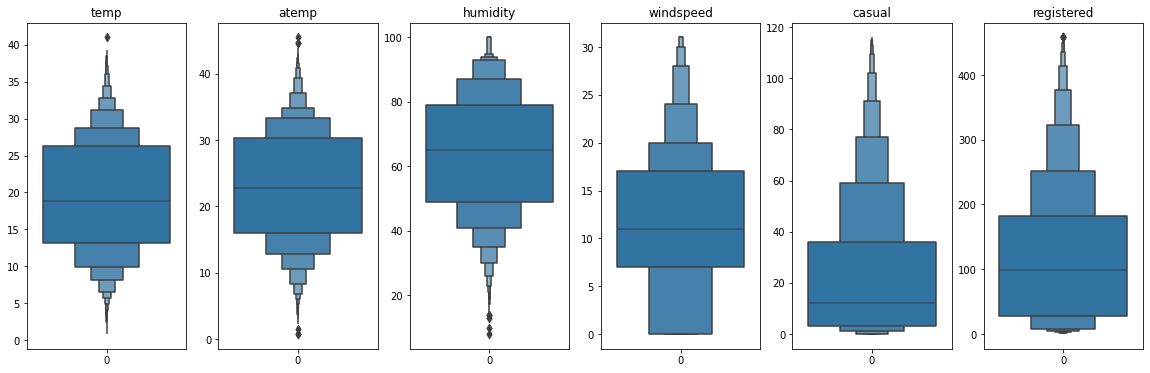

In [14]:
# 제거 확인 
fig, ax = plt.subplots(1,6, figsize = (20,6))
count = 0
for col in li_col : 
    sns.boxenplot(data = df_bi[col], ax = ax[count])
    ax[count].set_title(col)
    count +=1 
plt.show()

In [8]:
# 정규화 중 하나 minmax scaler 
# (x-min(x)) / (max(x) - min(x))


for col in li_col : 
    df_bi[col] = (df_bi[col] - min(df_bi[col])) / (max(df_bi[col]) - min(df_bi[col]))

df_bi.head()


# from sklearn.preprocessing import MinMaxScaler 
# scaler = MinMaxScaler()
# df_bi = scaler.fit_transform(df_bi)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,0.224490,0.305068,0.793478,0.0,0.025862,0.028384,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,0.204082,0.288064,0.782609,0.0,0.068966,0.069869,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,0.204082,0.288064,0.782609,0.0,0.043103,0.058952,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,0.224490,0.305068,0.728261,0.0,0.025862,0.021834,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,0.224490,0.305068,0.728261,0.0,0.000000,0.002183,1,1,0,0,0,1,0,0,0


In [16]:
df_bi.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
count,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,...,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000
mean,0.026751,0.709581,0.465373,0.495639,0.606894,0.390589,0.203378,0.264467,144.717787,0.260897,...,0.083022,0.080145,0.082490,0.077800,0.078866,0.082170,0.077587,0.081424,0.086966,0.091655
std,0.161362,0.453980,0.190963,0.186875,0.203075,0.240114,0.230723,0.233188,124.423204,0.439147,...,0.275931,0.271532,0.275124,0.267871,0.269544,0.274638,0.267535,0.273500,0.281800,0.288554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.306122,0.338964,0.445652,0.225848,0.025862,0.061135,33.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.448980,0.491442,0.619565,0.354874,0.103448,0.216157,119.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.632653,0.661036,0.771739,0.548303,0.310345,0.399563,226.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,563.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# 표준화 
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# df_bi = scaler.fit_transform(df_bi)

In [ ]:
# MaxAbsScaler 
# from sklearn.preprocessing import MaxAbsScaler 
# scaler = MaxAbsScaler()
# df_bi = scaler.fit_transform(df_bi)

> 파이프라인이란? 
[참고](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gdpresent&logNo=221730873049)
- `GridSearchCV`를 전에는 그냥 사용해도 됐음 왜냐면, 이미 데이터 전처리가 깔끔했기 때문에 
하지만, 현실에선 오류가 계속 발생한다. 
- 스케일이 들쭉날쭉한 데이터에 취약한 모델 ex) SVM 
- 그래서 MinMaxscaler 로 전처리한다고 했을 때! 
    - 1) train_set 전처리하고 
    - 2) grid search 하고 
    - 3) 최적의 파라미터가 적용된 모델 선언해주고 
    - 4) 그걸로 테스트 평가 
    - 5) 정밀도나 재현율까지 봐! 
    - => 그러면 안된다!!!! 왜냐!!! 머신러닝은 `미래에 새롭게 들어올 데이터를 예측`하기 위해 사용 
- 그러면 2019년 데이터로 2020년을 예측하려고 하는데, how?? 
    - 2010년까지만 학습시켜서 2011년 잘 예측하나보고, 2011로 학습해서 2012 예측하나보고.. 
    - 근데!! 모든 학습 데이터를 다 scale해서 그걸로 교차검증을 수행하면 **미래참조**임 
    - 교차 검증할 때, val_set은 전처리안하고 예측하게 하는 것 => `파이프라인` 

> 어떻게 사용하는가? 
- 나의 일의 진행 순서를 튜플로 넣어준다. 
- `Pipeline([(1번째 변환기 클랙스 객체의 이름, 객체), (2번째 변환기 클랙스 객체의 이름, 객체)...])
- 파이프 라인의 마지막 객체를 제외한 나머지 객체는 transform, fit_transform 메소드를 제공하는 변환기만 가능 
- 알아서 fit, transform, score까지 할 수 있게 해줌

In [ ]:
# from sklearn.pipeline import Pipeline
# scaler = MinMaxScaler()
# base_model = SVC()

# 내가 할 일 순서를 튜플로 넣어준다
# pipe = Pipeline(steps = [('scaler', scaler),
#                          'base_model', base_model])



# Section 05

## 5-1. 이상치 처리 
[참고](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
(이게 scaler 보다 앞에서 수행되어야 할 것으로 생각됨)

In [12]:
# 결측치 확인 
df_bi.isnull().sum()

datetime      0
holiday       0
workingday    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
season_1      0
season_2      0
season_3      0
season_4      0
weather_1     0
weather_2     0
weather_3     0
weather_4     0
dtype: int64

In [92]:
df_bi.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

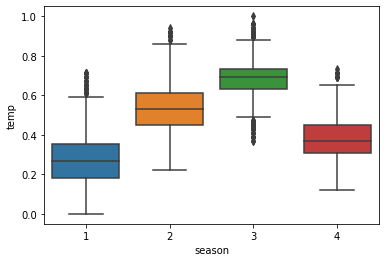

In [94]:
sns.boxplot(x="season", 

            y="temp", 

            data=df_bi)

plt.show()


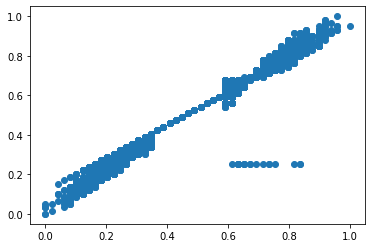

In [84]:
plt.scatter(x=df_bi['temp'], y = df_bi['atemp'])
# plt.scatter(x=df_bi['atemp'], y = df_bi['count'])
# plt.scatter(x=df_bi['humidity'], y = df_bi['count'])


In [ ]:
# 결측치 대체 
## 평균값 대체 
# df_bi[col] = df_bi[col].fillna(df_bi[col].mean())

## 열 제거 
# df_bi.dropna(inplace= True)

In [14]:
# 중복값 확인 
df_bi.duplicated().sum()

0

In [ ]:
# 중복 제거 
# df_bi.drop_duplicated(keep = 'first', inplace = True)

### 이상치 제거 1 : IQR
### 이상치 제거 2 : Z-Score
- `Z-Score` : 데이터 포인트가 평균에서 얼마나 많은 표준 편차를 가지는지 나타냄 
- ex) Z-Score = 1이면 데이터 포인트가 평균에서 1 표준편차 높다는 것 
- 이상치 : 3보다 크거나 -3보다 작은 모든 Z-Score는 이상치 

In [8]:
def outlier_z_score(data) : 
    threshold = 3 
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y-mean)/std for y in data]
    
    return np.where(np.abs(z_scores) > threshold)


### 이상치 제거 3 : DBSCAN 

In [9]:
from sklearn.cluster import DBSCAN
from random import seed
seed(1)

outlier_detection = DBSCAN(min_samples=2, eps =3) # 반경(eps) 내에 점들이 min_samples개이면 corepoint야!
clusters = outlier_detection.fit_predict(np.array(df_bi['temp']).reshape(-1,1))

print(list(clusters).count(-1))

# 0이 나왔기에 noise인 이상치는 존재하지 않음 

0


In [10]:
def outlier_dbscan(data) : 
    outlier_detection = DBSCAN(min_samples=2, eps =3) # 반경(eps) 내에 점들이 min_samples개이면 corepoint야!
    clusters = outlier_detection.fit_predict(np.array(data).reshape(-1,1))

    print(list(clusters).count(-1))

In [11]:
for i in ['temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered'] : 
    outlier_dbscan(df_bi[i])

0
0
0
0
0
0


### 이상치 제거 4 : Isolation Forest 
[참고](https://john-analyst.medium.com/isolation-forest%EB%A5%BC-%ED%86%B5%ED%95%9C-%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80-%EB%AA%A8%EB%8D%B8-9b10b43eb4ac)

- 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적다. 
- robust한 모델을 만들 수 있다

- `다차원 데이터셋`에서 효율적으로 작동하는 아웃라이어 제거 방법 
- 의사결정 트리기반 이상탐지 기법 
- 랜덤하게 칼럼을 선택하고, 선택된 칼럼의 최대값과 최소값을 분리하는 값을 랜덤으로 선택하는 방법 

- -1 이면 이상치, 1이면 정상

In [12]:
from sklearn.ensemble import IsolationForest

def iso(data) : 
    clf = IsolationForest(behaviour= 'new', max_samples=100, random_state=1, contamination= 'auto')
    pred = clf.fit_predict(np.array(data).reshape(-1,1))
    print(pred)
    
for i in ['temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered'] : 
    print(i, end = ' ')
    iso(df_bi[i])

temp [-1 -1 -1 ...  1  1  1]
atemp [-1 -1 -1 ...  1  1  1]
humidity [ 1 -1 -1 ...  1  1  1]
windspeed [-1 -1 -1 ...  1 -1  1]
casual [1 1 1 ... 1 1 1]
registered [-1 -1 -1 ...  1  1  1]


근데 결과값이 이렇게 이상치가 많다고..?

### 이상치 제거 5 : LOF (local outlier factor)
[참고](https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2019/03/11/Local-Outlier-Factor(LOF).html)

> 배경 
- 기존 이상치 제거 방법들은 **local 정보에 대한 고려가 없음**
    - density based methond 
        - 밀도가 상이한 클러스터들이 있을 때 문제 발생 ('dense'라는 개념을 정의하기 위해, 특정한 window size나 최소 개수를 이용)
        - dense가 상이하면 dense에 대한 절대적인 기준을 지정할 수 X 문제 발생 
- **=> local의 상대적인 dense를 비교하여 outlier를 정하자!!**

> 방법은? 
- 1) `k-distance(p)` 
    - 특정데이터(p)에서의 k개의 nearest neighbor까지의 거리이다 ex) 3_distance(p) : 3번째로 가까운 데이터와의 거리 => 이게 상대적인 dense로 작용 
    - 거리가 *연속형*이면 괜찮지만, *이산형*이면 겹치는 경우가 존재해서 3-distance 안에 5개든 10개든 존재할 수 있음 
    - 그래서 그 안에 들어온 데이터 개수를 `Nk(p)`라고 한다. 

- 2) `reachapbility distance(p,o)`
    - 관심데이터 p가 주변데이터 o의 k-distance 내에 들어와 있으면 o의 **k-distance**를, 아니면 **p와 0의 거리**를 잰다. 
    - reach-distance(p,o)=max{k_distance(o),dist(p,o)}

- 3) `local reachability density(p)` 
    - p 주변의 k-neighbor들과의 reach_dist의 평균을 역수로 취한 것 

- 4) `Local Outlier Factor(p)` 
    - p의 `Nk(p)`에 속하는 모든 다른점 O에 대해서 `lrd`의 비율을 구하고, 이를 평균낸 것이다. 
    - lof가 1에 가까우면 `정상데이터`, lof >= 1이면 `이상치` 




In [13]:
df_bi.shape

(9383, 12)

In [18]:
from sklearn.neighbors import LocalOutlierFactor 

clf = LocalOutlierFactor(n_neighbors= 10, contamination=0.1) 
# 경험적으로 k =20이 좋다고 한다. threshold = contamination (train data 중 몇 %가 outlier인지 지정)
y_pred = clf.fit_predict(np.array(df_bi['temp']).reshape(-1,1))
print(y_pred)


[1 1 1 ... 1 1 1]


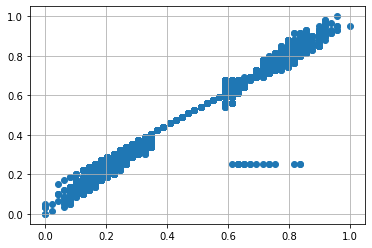

In [32]:
plt.scatter(df_bi['temp'], df_bi['atemp'])
plt.grid()

이상치 존재 확인 

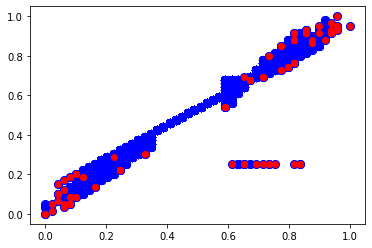

In [72]:
from numpy import where 
# model specification
model1 = LocalOutlierFactor(n_neighbors = 4, contamination = 0.1)
# model fitting
y_pred = model1.fit_predict(df_bi[['temp', 'atemp']])
# filter outlier index
outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df_bi.iloc[outlier_index]
# plot data
plt.scatter(df_bi["temp"], df_bi["atemp"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["temp"], outlier_values["atemp"], color = "r")

아................ 왜 이상치가 아닌 애들도 이상치라고 판단하는 거지?? 
그러면 이상치 제거를 어떻게 해야 하는거지 ....? 

> 궁금한 점 
- 이상치를 컬럼별로 제거하고? (이건 연속형에만 해당될 것 같음)
- 컬럼끼리 묶어서 이상치 확인하고 (temp랑 atemp한 것처럼, 연속형끼리도 있고, 연속형 - 이산형끼리도 있을 듯)
- 근데 그 때 이상치가 아닌데도 삭제되면 우짬? 


# Section 06 


## 6-1 중요 특성 찾기 

- 일단 회귀 모델을 사용하기 때문에 내 생각엔 datetime 처리를 위해서 section 07을 먼저 수행하고 해야 한다 
- 그리고 다중공산성은 언제 함??? 

In [15]:
from sklearn.model_selection import train_test_split
X = df_bi.drop(['count', 'casual', 'registered'], axis = 1)
y = df_bi['count']

x_train, x_test, y_train, y_test = train_test_split(X, y , random_state = 0)

### 선형회귀모델로 성능 확인하기

In [142]:
x_train.shape, x_test.shape

((8164, 52), (2722, 52))

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) # 기울기 파라미터 (가중치 w)

print("lr.intercept_ : {}".format(lr.intercept_)) # 절편 (b)

print("훈련 세트의 정확도 : {:.2f}".format(lr.score(x_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lr.score(x_test,y_test)))

lr.coef_: [-5.65033056e+00  3.79313194e+00  1.28671416e+02  6.43876583e+01
 -8.29111067e+01 -3.94360364e+01  2.85463898e+13  4.70857988e+13
  2.78631611e+13  4.77337756e+13 -1.17671472e+13 -1.17671472e+13
 -1.17671472e+13 -1.17671472e+13 -6.63730208e+10 -6.63730208e+10
 -6.63730208e+10 -6.63730209e+10 -6.63730209e+10 -6.63730208e+10
 -6.63730208e+10 -6.63730206e+10 -6.63730205e+10 -6.63730206e+10
 -6.63730207e+10 -6.63730207e+10 -6.63730206e+10 -6.63730206e+10
 -6.63730207e+10 -6.63730206e+10 -6.63730206e+10 -6.63730204e+10
 -6.63730205e+10 -6.63730206e+10 -6.63730207e+10 -6.63730207e+10
 -6.63730207e+10 -6.63730208e+10 -1.29687770e+10 -1.29687769e+10
  7.32178919e+12  7.32178919e+12  7.32178919e+12 -1.12176198e+13
 -1.12176198e+13 -1.12176198e+13  8.00501790e+12  8.00501790e+12
  8.00501790e+12 -1.18655966e+13 -1.18655966e+13 -1.18655966e+13]
lr.intercept_ : -24021690062499.09
훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69


### 라쏘 (L1-norm)

In [151]:
from sklearn.linear_model import Lasso 

lasso = Lasso().fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso.n_iter_))

print()

# 55개의 특성 중 33개 사용함 


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso001.n_iter_))

print()

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso001.n_iter_))

print()

훈련 세트의 정확도 : 0.67
테스트 세트의 정확도 : 0.67
사용한 특성의 수 : 33
사용한 max_iter : 159

훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69
사용한 특성의 수 : 51
사용한 max_iter : 174

훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69
사용한 특성의 수 : 51
사용한 max_iter : 174



### 릿지 (L2-norm)

In [146]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(x_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(x_test,y_test)))


훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69


In [150]:
# alpha값을 바꿔서 확인해보자.

ridge10 = Ridge(alpha=10).fit(x_train, y_train)



print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(x_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(x_test,y_test)))





# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.

ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)



print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(x_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(x_test,y_test)))

# 훈련 세트의 정확도 : 0.92

# 테스트 세트의 정확도 : 0.82

훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69
훈련 세트의 정확도 : 0.70
테스트 세트의 정확도 : 0.69


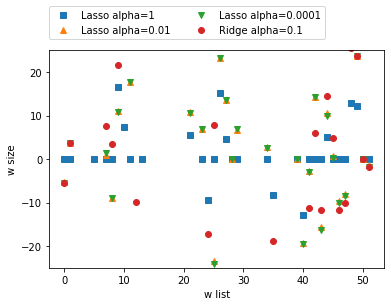

In [152]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")

plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")

plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))

plt.xlabel("w list")

plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)

plt.show()

- alpha가 1일 때, 대부분이 0이다 
- alpah가 0.01로 줄이면 0.0001과 큰 차이가 없음 

- ridge는 성능은 비슷하나 0인 계수는 없다

### 엘라스틱넷

In [162]:
from sklearn.linear_model import ElasticNet
alpha=0.01
ratios = [0.2, 0.5, 0.8] # 이거 정확히 이해 못함 


for ratio in ratios:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=10)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    print(elasticnet.score(x_test, y_test))

0.6769770377617443
0.6824916870991569
0.6855437487945137


In [171]:
abs_coef = np.abs(elasticnet.coef_) # 계수 절대값 
before = np.argsort(abs_coef) # 계수 정렬 전 index 담기 

array([  0.        ,   0.77313506,   0.99178905,   3.75289772,
         3.83271619,   4.764932  ,   4.7722564 ,   5.06065561,
         6.16656582,   6.52996797,   7.74716895,   9.89265679,
        11.89889622,  12.70899032,  14.01146525,  16.94020198,
        17.1580881 ,  18.08901455,  19.57353616,  23.96536718,
        26.62072053,  27.44561758,  27.46378738,  27.88034787,
        28.74116331,  32.25803096,  34.69632393,  35.09212583,
        36.62890022,  40.77317137,  40.80166132,  41.54854403,
        41.83713172,  44.55983932,  50.99598143,  51.35181103,
        88.03833351,  88.65726027,  89.15398239,  89.76273447,
        94.08359948, 101.97198902, 108.10511872, 118.76382338,
       137.44641296, 143.20677806, 150.67998663, 157.76994156,
       159.58465128, 186.70761025, 214.53412376, 245.50362342])

In [180]:
before[-16:] # 계수 중요 top16의 index 뽑기 

array([20, 37,  4,  3, 30,  2, 33, 14, 15, 19, 16, 17, 18, 22, 32, 31],
      dtype=int64)

In [181]:
for i in before[-16:] : 
    print(df_bi.columns[i]) # 제일 중요한 top16 변수 명 출력 

hour_03:00:00
hour_20:00:00
humidity
atemp
hour_13:00:00
temp
hour_16:00:00
weather_2
weather_3
hour_02:00:00
weather_4
hour_00:00:00
hour_01:00:00
hour_05:00:00
hour_15:00:00
hour_14:00:00


## 6-2 특성선택 

### 단변량 특성 선택

In [27]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=70).fit(x_train, y_train) # 70%만 사용 

x_train_select = select.transform(x_train)
x_test_selected  = select.transform(x_test)

print(x_train.shape)
print(x_train_select.shape)


(7037, 52)
(7037, 36)


In [28]:
# 어떤 특성이 선택되었는가 
idx = select.get_support()
for index, value in enumerate(idx) : 
    if value : 
        print(x_train.columns[index], end = ' / ')

temp / atemp / humidity / windspeed / season_1 / season_2 / season_3 / season_4 / hour_00:00:00 / hour_01:00:00 / hour_02:00:00 / hour_03:00:00 / hour_04:00:00 / hour_05:00:00 / hour_07:00:00 / hour_08:00:00 / hour_09:00:00 / hour_10:00:00 / hour_11:00:00 / hour_12:00:00 / hour_13:00:00 / hour_14:00:00 / hour_15:00:00 / hour_16:00:00 / hour_17:00:00 / hour_18:00:00 / hour_19:00:00 / hour_20:00:00 / hour_21:00:00 / hour_22:00:00 / hour_23:00:00 / year_2011 / year_2012 / month_06 / month_07 / month_08 / 

In [29]:
# 성능 비교 

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
print('전체 특성을 사용한 점수: \n{:.3f}'.format(lr.score(x_test, y_test))) # 0.709



### 일부특성을 사용했을 때 정확도
lr = LinearRegression().fit(x_train_select, y_train)
print('선택된 특성을 사용한 점수 \n{:.3f}'.format(lr.score(x_test_selected, y_test))) # 0.690

전체 특성을 사용한 점수: 
0.709
선택된 특성을 사용한 점수 
0.690


### 모델 기반 특성 선택 
[참고](https://blog.naver.com/PostView.nhn?blogId=bosongmoon&logNo=221807565642)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 분류기
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_ 

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
# forest 모델 내 특성 중 지니계수 혹은 엔트로피 등 기준의 값이 0.1 이상일 경우의 특징을 선택 

x_selected = sfm.transform(x_train)


print('이 임계 조건을 만족하는 샘플의 수:', x_selected.shape[1])


# Section 07 특성생성 

## 7-1 특성추가 

In [10]:
# 시간 추출 
def hour_split(x) : 
    result = x.split()
    return result[1]

df_bi['hour'] =  df_bi['datetime'].apply(hour_split)
df_bi['hour'].unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [11]:
# 연도 추출
def year_split(x) : 
    result = x.split()
    return result[0][:4]
df_bi['year'] = df_bi['datetime'].apply(year_split)
df_bi['year'].unique()

array(['2011', '2012'], dtype=object)

In [12]:
# 월 추출 
def month_split(x) : 
    result = x.split()
    return result[0][5:7]
df_bi['month'] = df_bi['datetime'].apply(month_split)
df_bi['month'].unique()

# 일자는 사용 안 함 

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [13]:
# datetime 제거 
df_bi.drop('datetime', axis = 1, inplace= True)
df_bi.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,year,month
0,0,0,0.224490,0.305068,0.793478,0.0,0.025862,0.028384,16,1,0,0,0,1,0,0,0,00:00:00,2011,01
1,0,0,0.204082,0.288064,0.782609,0.0,0.068966,0.069869,40,1,0,0,0,1,0,0,0,01:00:00,2011,01


In [14]:
# 원핫인코딩 
print("전 : ",df_bi.shape)
df_bi = pd.get_dummies(df_bi, columns= ['hour', 'year', 'month'])
print("후 : ", df_bi.shape)
df_bi.head()

전 :  (9383, 20)
후 :  (9383, 55)


,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,0.224490,0.305068,0.793478,0.0,0.025862,0.028384,16,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.204082,0.288064,0.782609,0.0,0.068966,0.069869,40,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.204082,0.288064,0.782609,0.0,0.043103,0.058952,32,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.224490,0.305068,0.728261,0.0,0.025862,0.021834,13,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.224490,0.305068,0.728261,0.0,0.000000,0.002183,1,1,...,0,0,0,0,0,0,0,0,0,0
